# Install pyCircos


In [ ]:
import pycircos
import collections
import matplotlib.pyplot as plt
import numpy as np
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle


# Figure 1 circos

In [ ]:
#Set chromosomes
circle = Gcircle(figsize=(20,20))
with open("circos/tissuecounts.csv") as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",")
        name   = line[0]
        length = int(line[-1])
        arc    = Garc(arc_id=name, size=length, interspace=3, raxis_range=(950,1000), labelposition=60, label_visible=True, facecolor='w')
        circle.add_garc(arc)

<Figure size 2000x2000 with 0 Axes>

In [ ]:
circle.set_garcs()

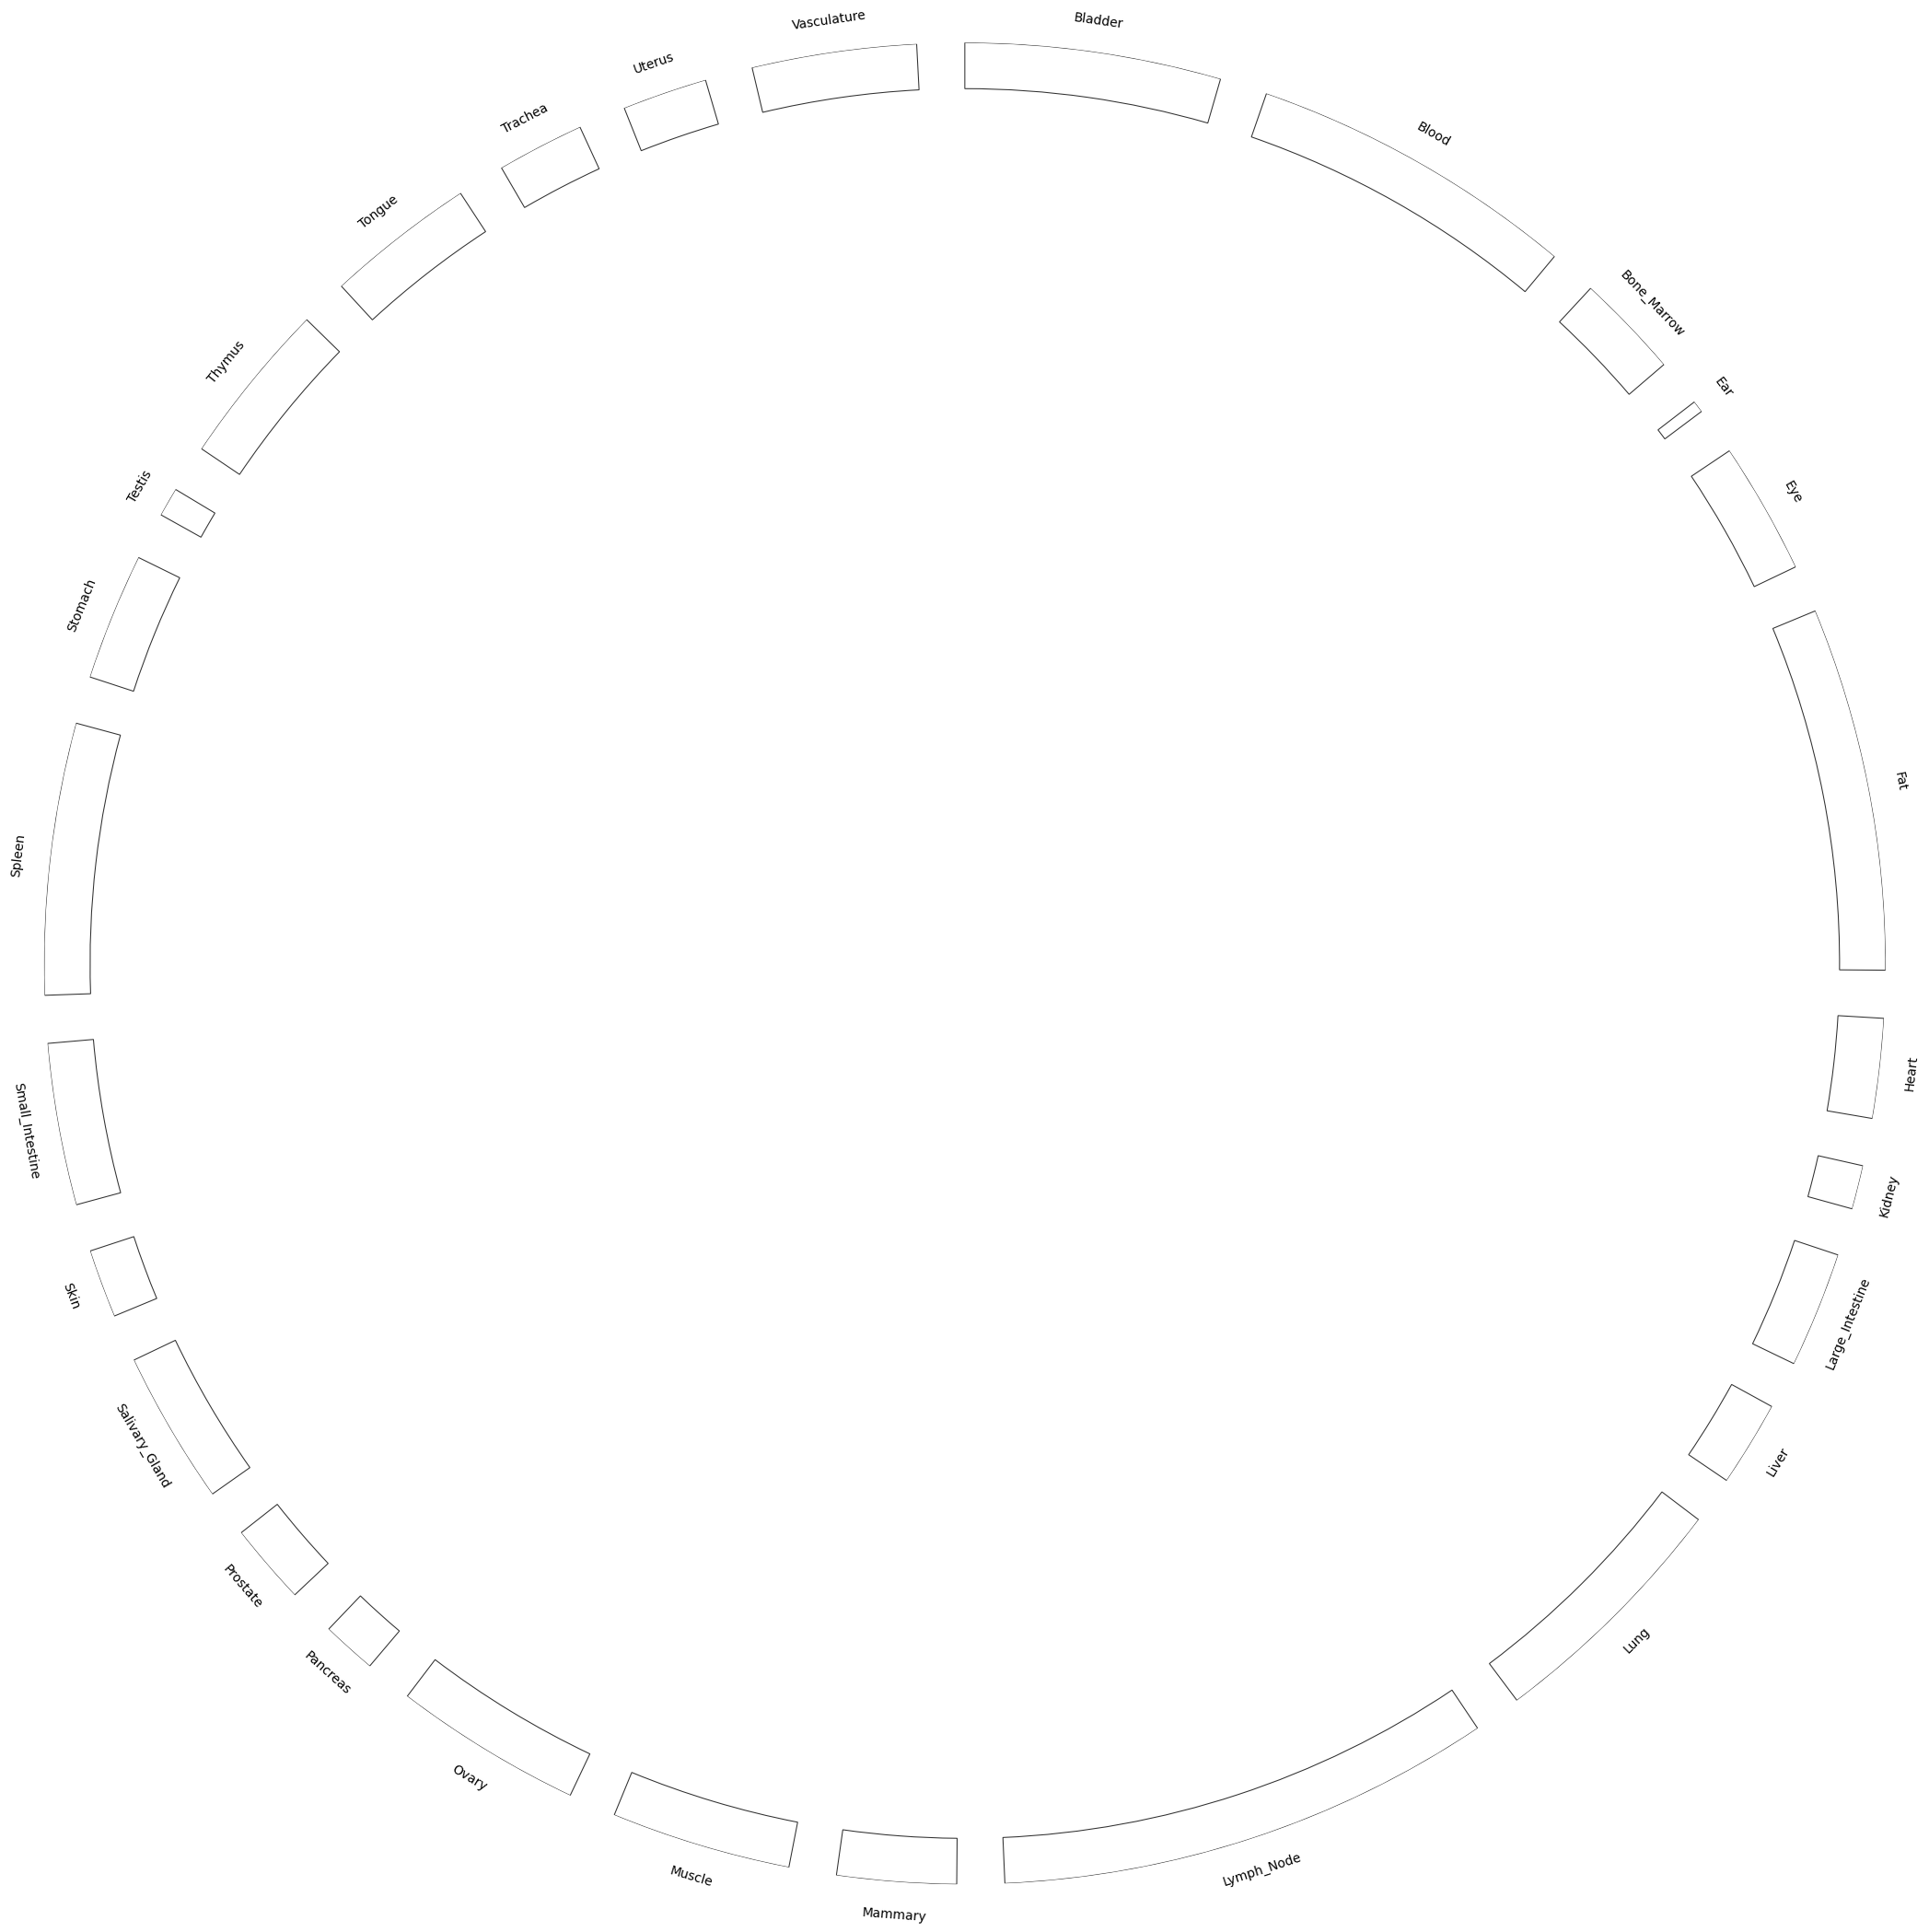

In [ ]:
circle.figure

In [ ]:
donor_color_dict = {
    'TSP1': '#f9fdcc',
     'TSP2': '#f3fabf',
     'TSP3': '#edf8b1',
     'TSP4': '#e1f3b2',
     'TSP5': '#d4eeb3',
     'TSP6': '#c8e9b4',
     'TSP7': '#b0e0b6',
     'TSP8': '#97d6b9',
     'TSP9': '#7ecdbb',
     'TSP10': '#6bc6be',
     'TSP11': '#55bec1',
     'TSP12': '#40b5c4',
     'TSP13': '#35aac3',
     'TSP14': '#299dc1',
     'TSP15': '#1d91c0',
     'TSP17': '#1f80b8',
     'TSP19': '#206eb0',
     'TSP20': '#225ea8',
     'TSP21': '#2350a1',
     'TSP25': '#24419a',
     'TSP26': '#253494',
     'TSP27': '#1b2c80',
     'TSP28': '#11246b',
     'TSP30': '#081d58'
}

tissue_color_dict = {'Bladder': '#e7969c',
 'Blood': '#d6616b',
 'Bone_Marrow': '#cedb9c',
 'Eye': '#c7ea46',
 'Ear': '#194E7D',
 'Fat': '#ECC98C',
 'Heart': '#ff0800',
 'Kidney': '#7b4173',
 'Large_Intestine': '#31a354',
 'Liver': '#000080',
 'Lung': '#3182bd',
 'Lymph_Node': '#8c6d31',
 'Mammary': '#ce6dbd',
 'Muscle': '#e7ba52',
 'Ovary': '#e2e752',
 'Pancreas': '#fd8d3c',
 'Prostate': '#637939',
 'Salivary_Gland': '#622a0f',
 'Skin': '#de9ed6',
 'Small_Intestine': '#6baed6',
 'Spleen': '#393b79',
 'Stomach': '#FFE200',
 'Testis': '#626175',
 'Thymus': '#9c9ede',
 'Tongue': '#b5cf6b',
 'Trachea': '#969696',
 'Uterus': '#c64b8c',
 'Vasculature': '#843c39'}


In [ ]:
method_color_dict = {'10X': '#90ee90', 'smartseq2': '#006400'}

In [ ]:
age_color_dict = {
    22.0: '#47C16EFF',# '#3FBF3F',
    26.0: '#47C16EFF',
    33.0: '#47C16EFF',
    36.0: '#47C16EFF',
    37.0: '#47C16EFF',
    38.0: '#47C16EFF',
    40.0: '#FDE725FF', # '#F6C503', 
    42.0: '#FDE725FF',
    45.0: '#FDE725FF',
    46.0: '#FDE725FF',
    55.0: '#FDE725FF',
    56.0: '#FDE725FF',
    57.0: '#FDE725FF',
    59.0: '#FDE725FF',
    60.0: '#400554FF', # '#F60303',
    61.0: '#400554FF',
    67.0: '#400554FF',
    69.0: '#400554FF',
    74.0: '#400554FF'}

In [ ]:
sex_color_dict = {'female': '#ac4962', 'male': '#546e9a'}

In [ ]:
import collections

arcdata_dict = collections.defaultdict(dict)
with open("circos/tissuedonorcounts.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]
        start = int(line[1])-1
        width = int(line[2])-1-(int(line[1]))#-1)
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = []
            arcdata_dict[name]["colors"]    = []
        arcdata_dict[name]["positions"].append(start)
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["colors"].append(donor_color_dict[line[-2]])

for key in arcdata_dict:
    circle.barplot(key, data=[1]*len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"],
                   width=arcdata_dict[key]["widths"], raxis_range=[950,1000], 
                   facecolor=arcdata_dict[key]["colors"],
                   linewidth=1, edgecolor="k"
                  )


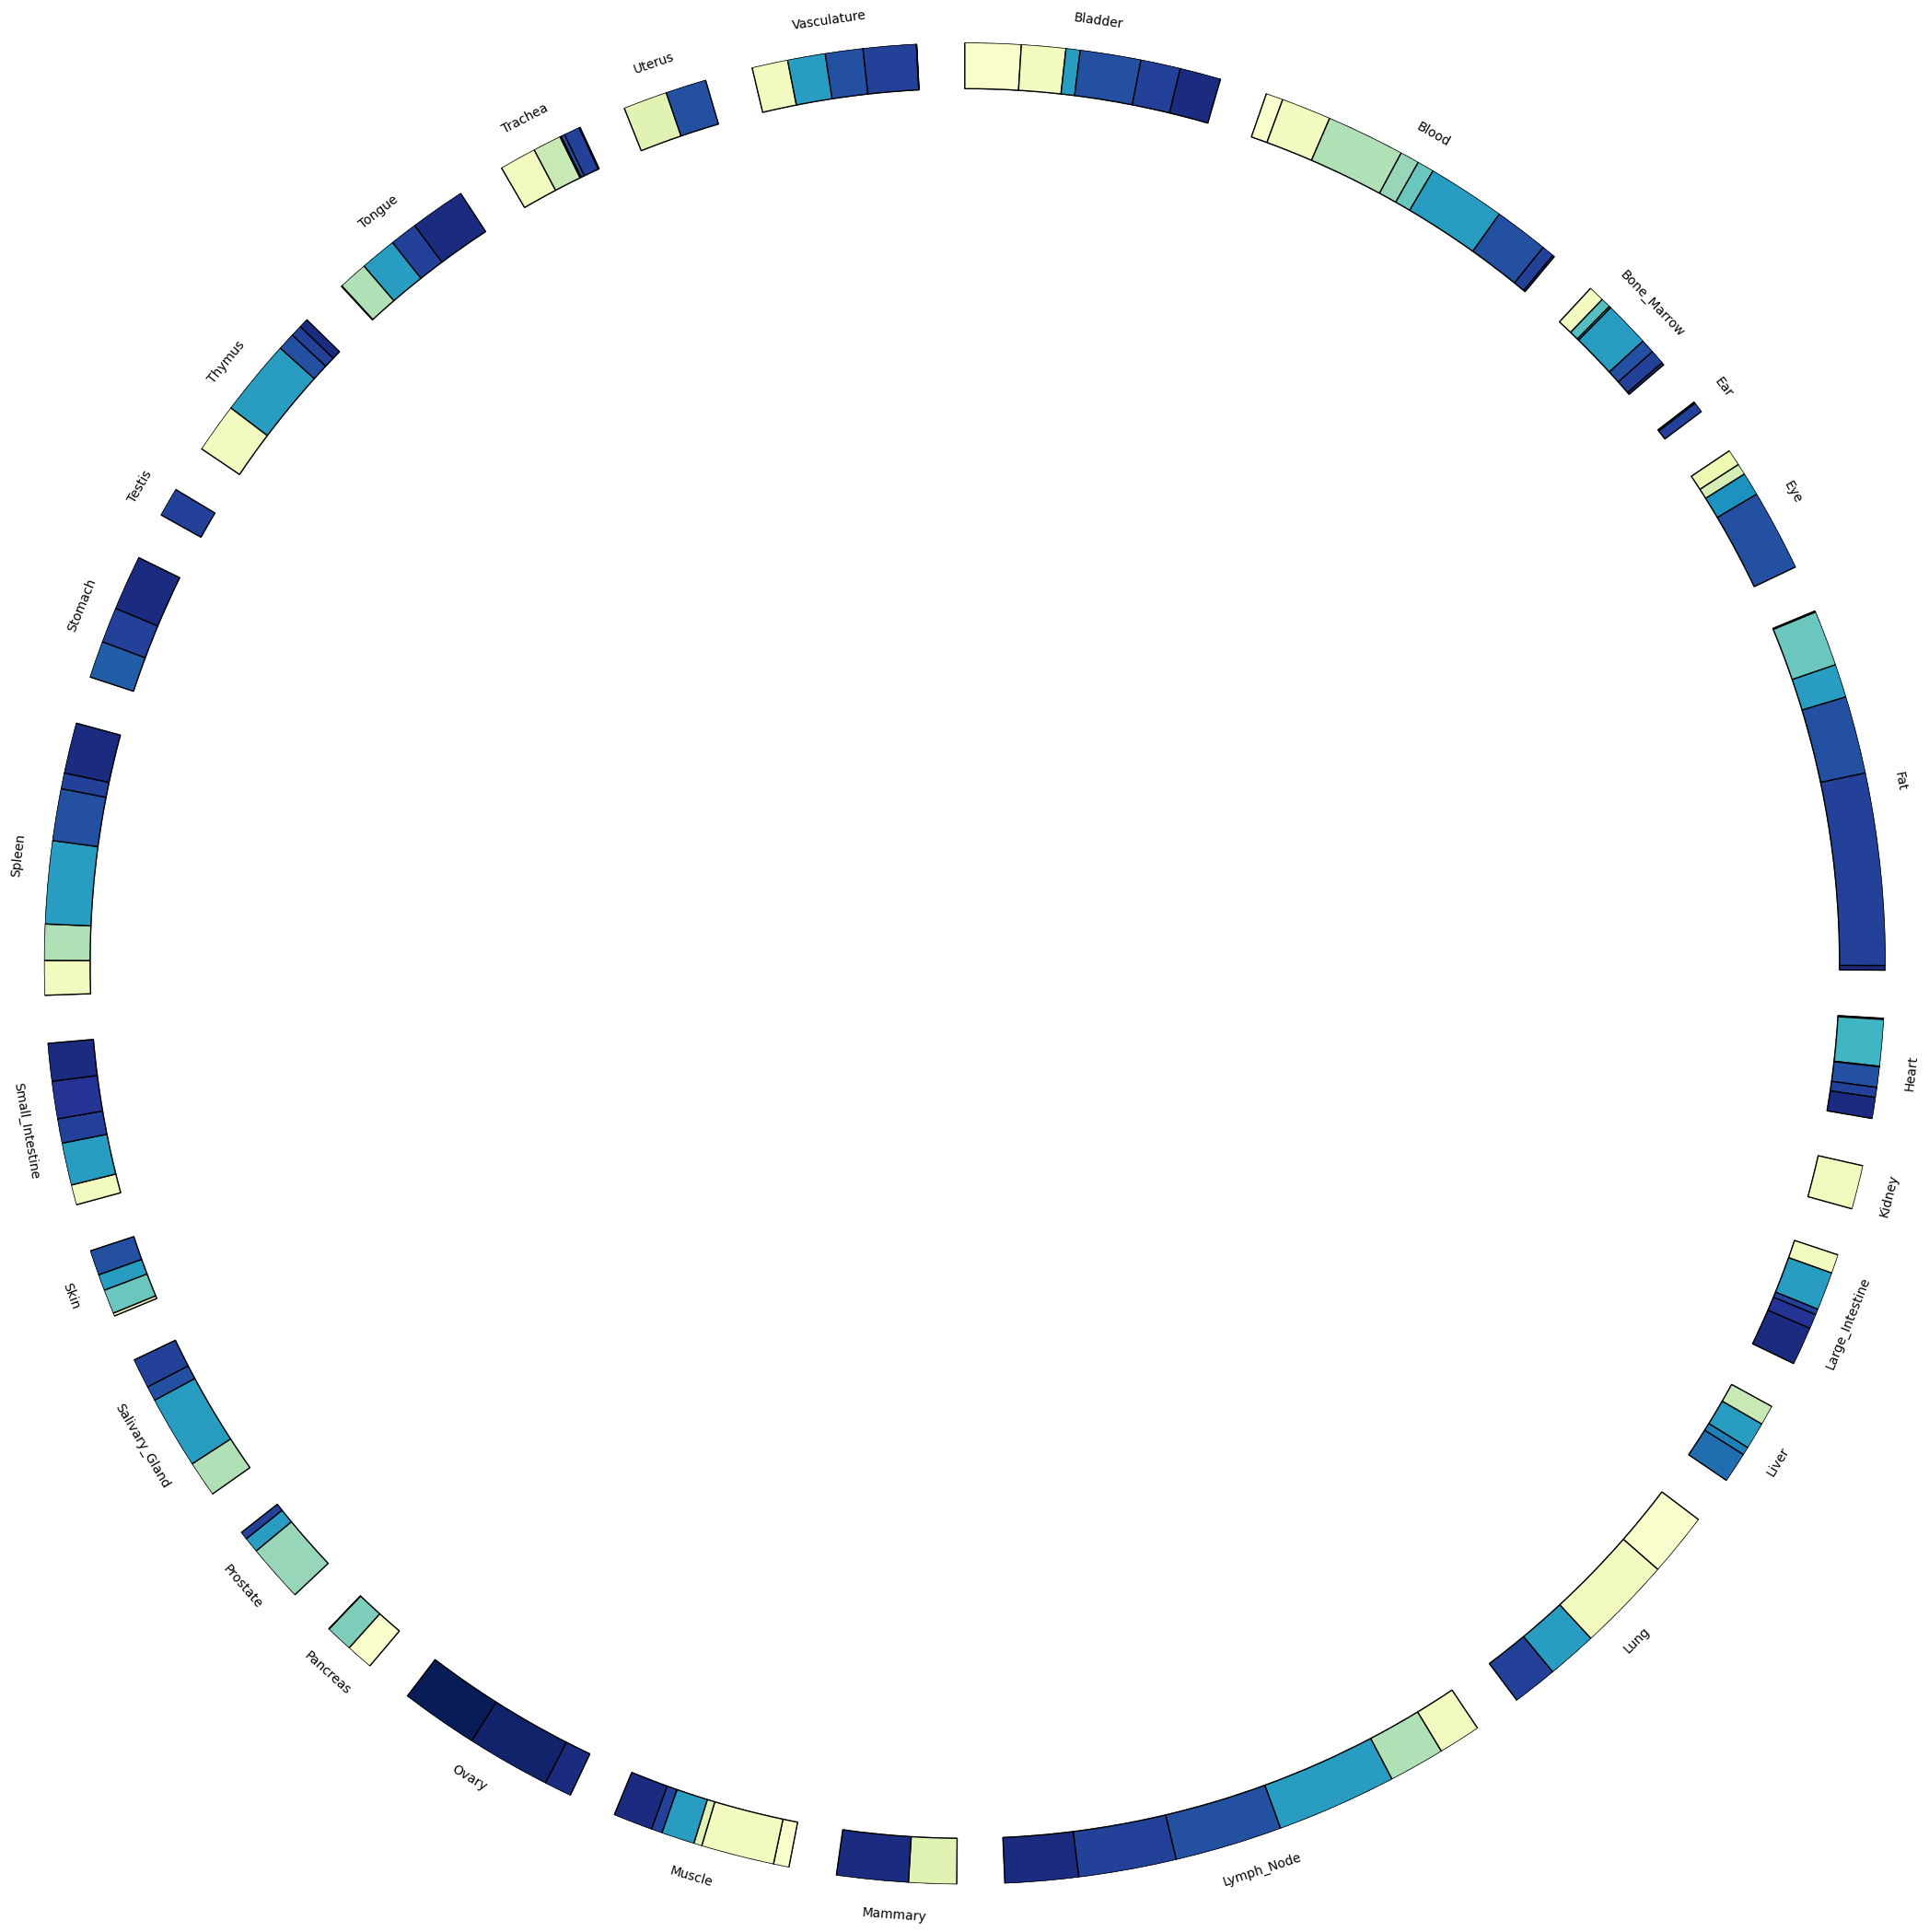

In [ ]:
circle.figure

In [ ]:
#bar plot
values_all   = []
arcdata_dict = collections.defaultdict(dict)
with open("circos/tissuedonorcounts.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]
        start = int(line[1])-1
        end   = int(line[2])
        width = end-start
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = []
            arcdata_dict[name]["values"]    = []
            arcdata_dict[name]["colors"]    = []
        arcdata_dict[name]["positions"].append(start)
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["values"].append(float(line[-1]))
        arcdata_dict[name]["colors"].append(donor_color_dict[line[-2]])
        values_all.append(float(line[-1]))

vmin, vmax = min(values_all), max(values_all)
for key in arcdata_dict:
    circle.barplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"],
                   width=arcdata_dict[key]["widths"], base_value=0.0, rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
                   raxis_range=[860,940],
                   facecolor=arcdata_dict[key]["colors"],
                   linewidth=1, edgecolor="k",
                   spine=True)

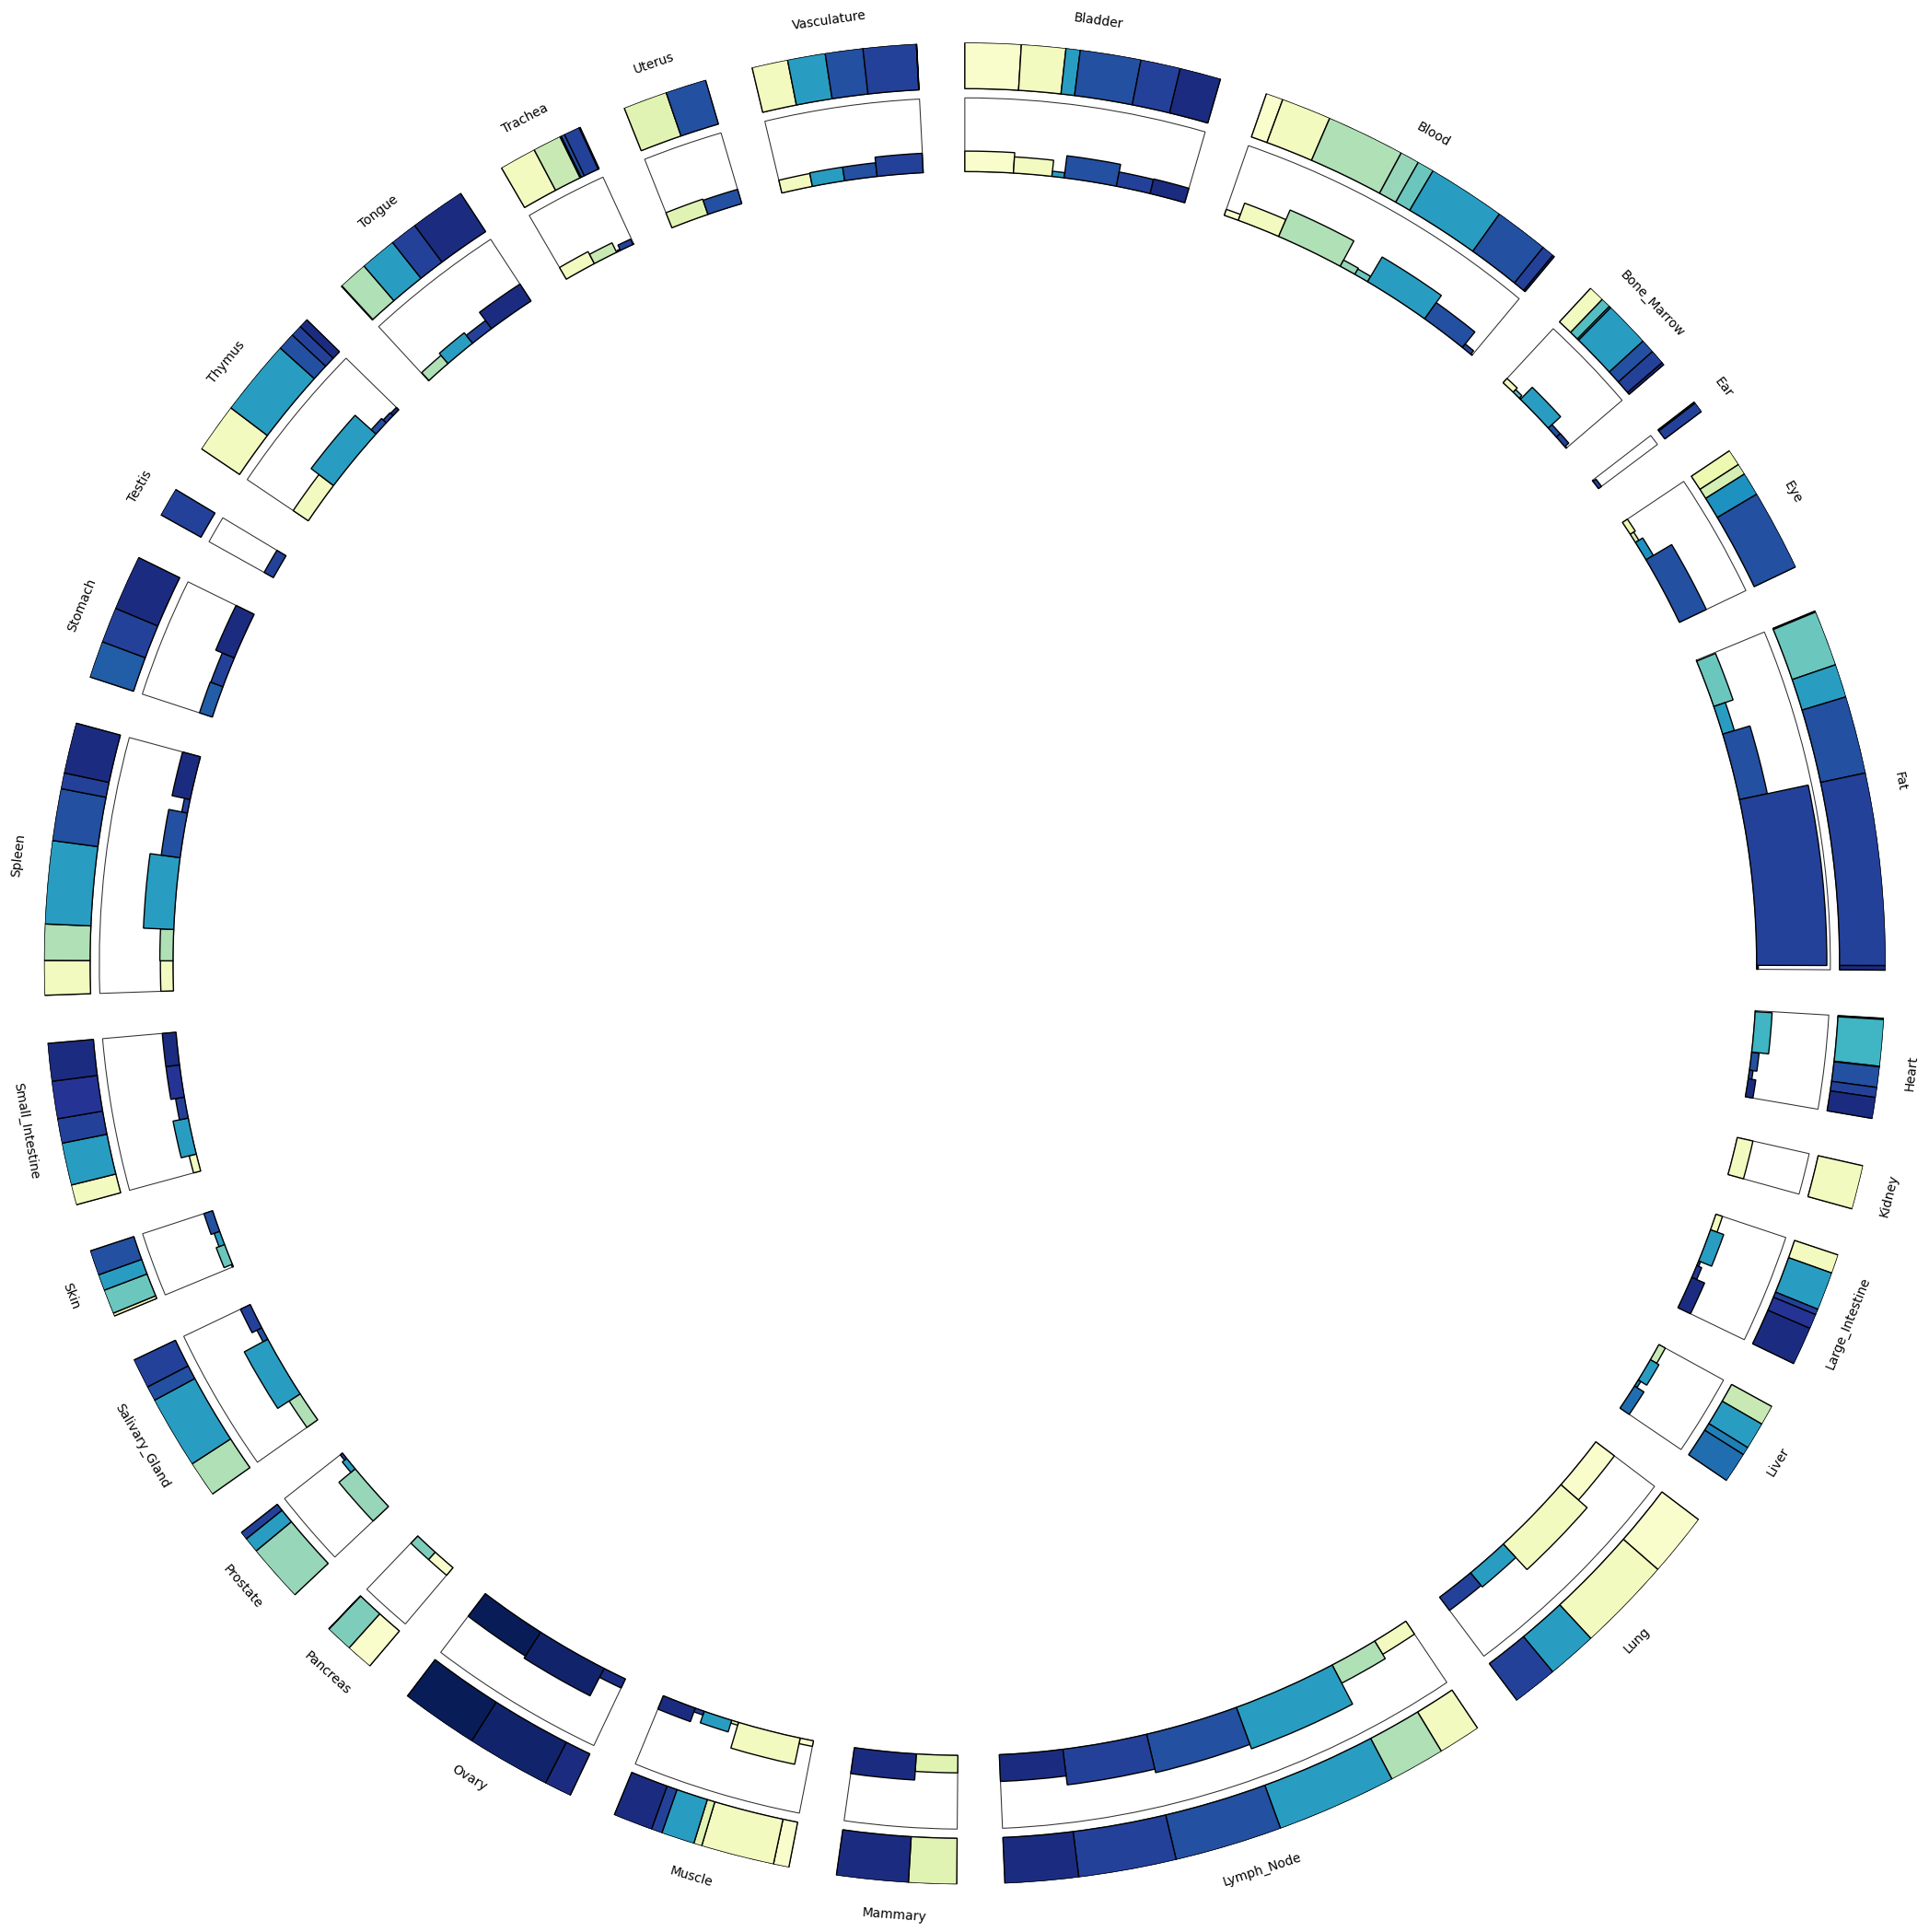

In [ ]:
circle.figure

In [ ]:
#scatter plot
values_all   = []
arcdata_dict = collections.defaultdict(dict)
with open("circos/tissuedonorage.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]
        start = int(line[1])-1
        end   = int(line[2])
        mid   = (start+end)/2
        value = float(line[-1])
        values_all.append(value)
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
            arcdata_dict[name]["colors"] = []
        arcdata_dict[name]["positions"].append(mid)
        arcdata_dict[name]["values"].append(value)
        arcdata_dict[name]["colors"].append(age_color_dict[np.float64(line[-1])])

vmin, vmax = min(values_all), max(values_all)
for key in arcdata_dict:
    circle.scatterplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"],
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(770,850), 
                   facecolor=arcdata_dict[key]["colors"],markersize=100,markershape='D',
                       linewidth=2,edgecolor=arcdata_dict[key]["colors"],
                       spine=True)

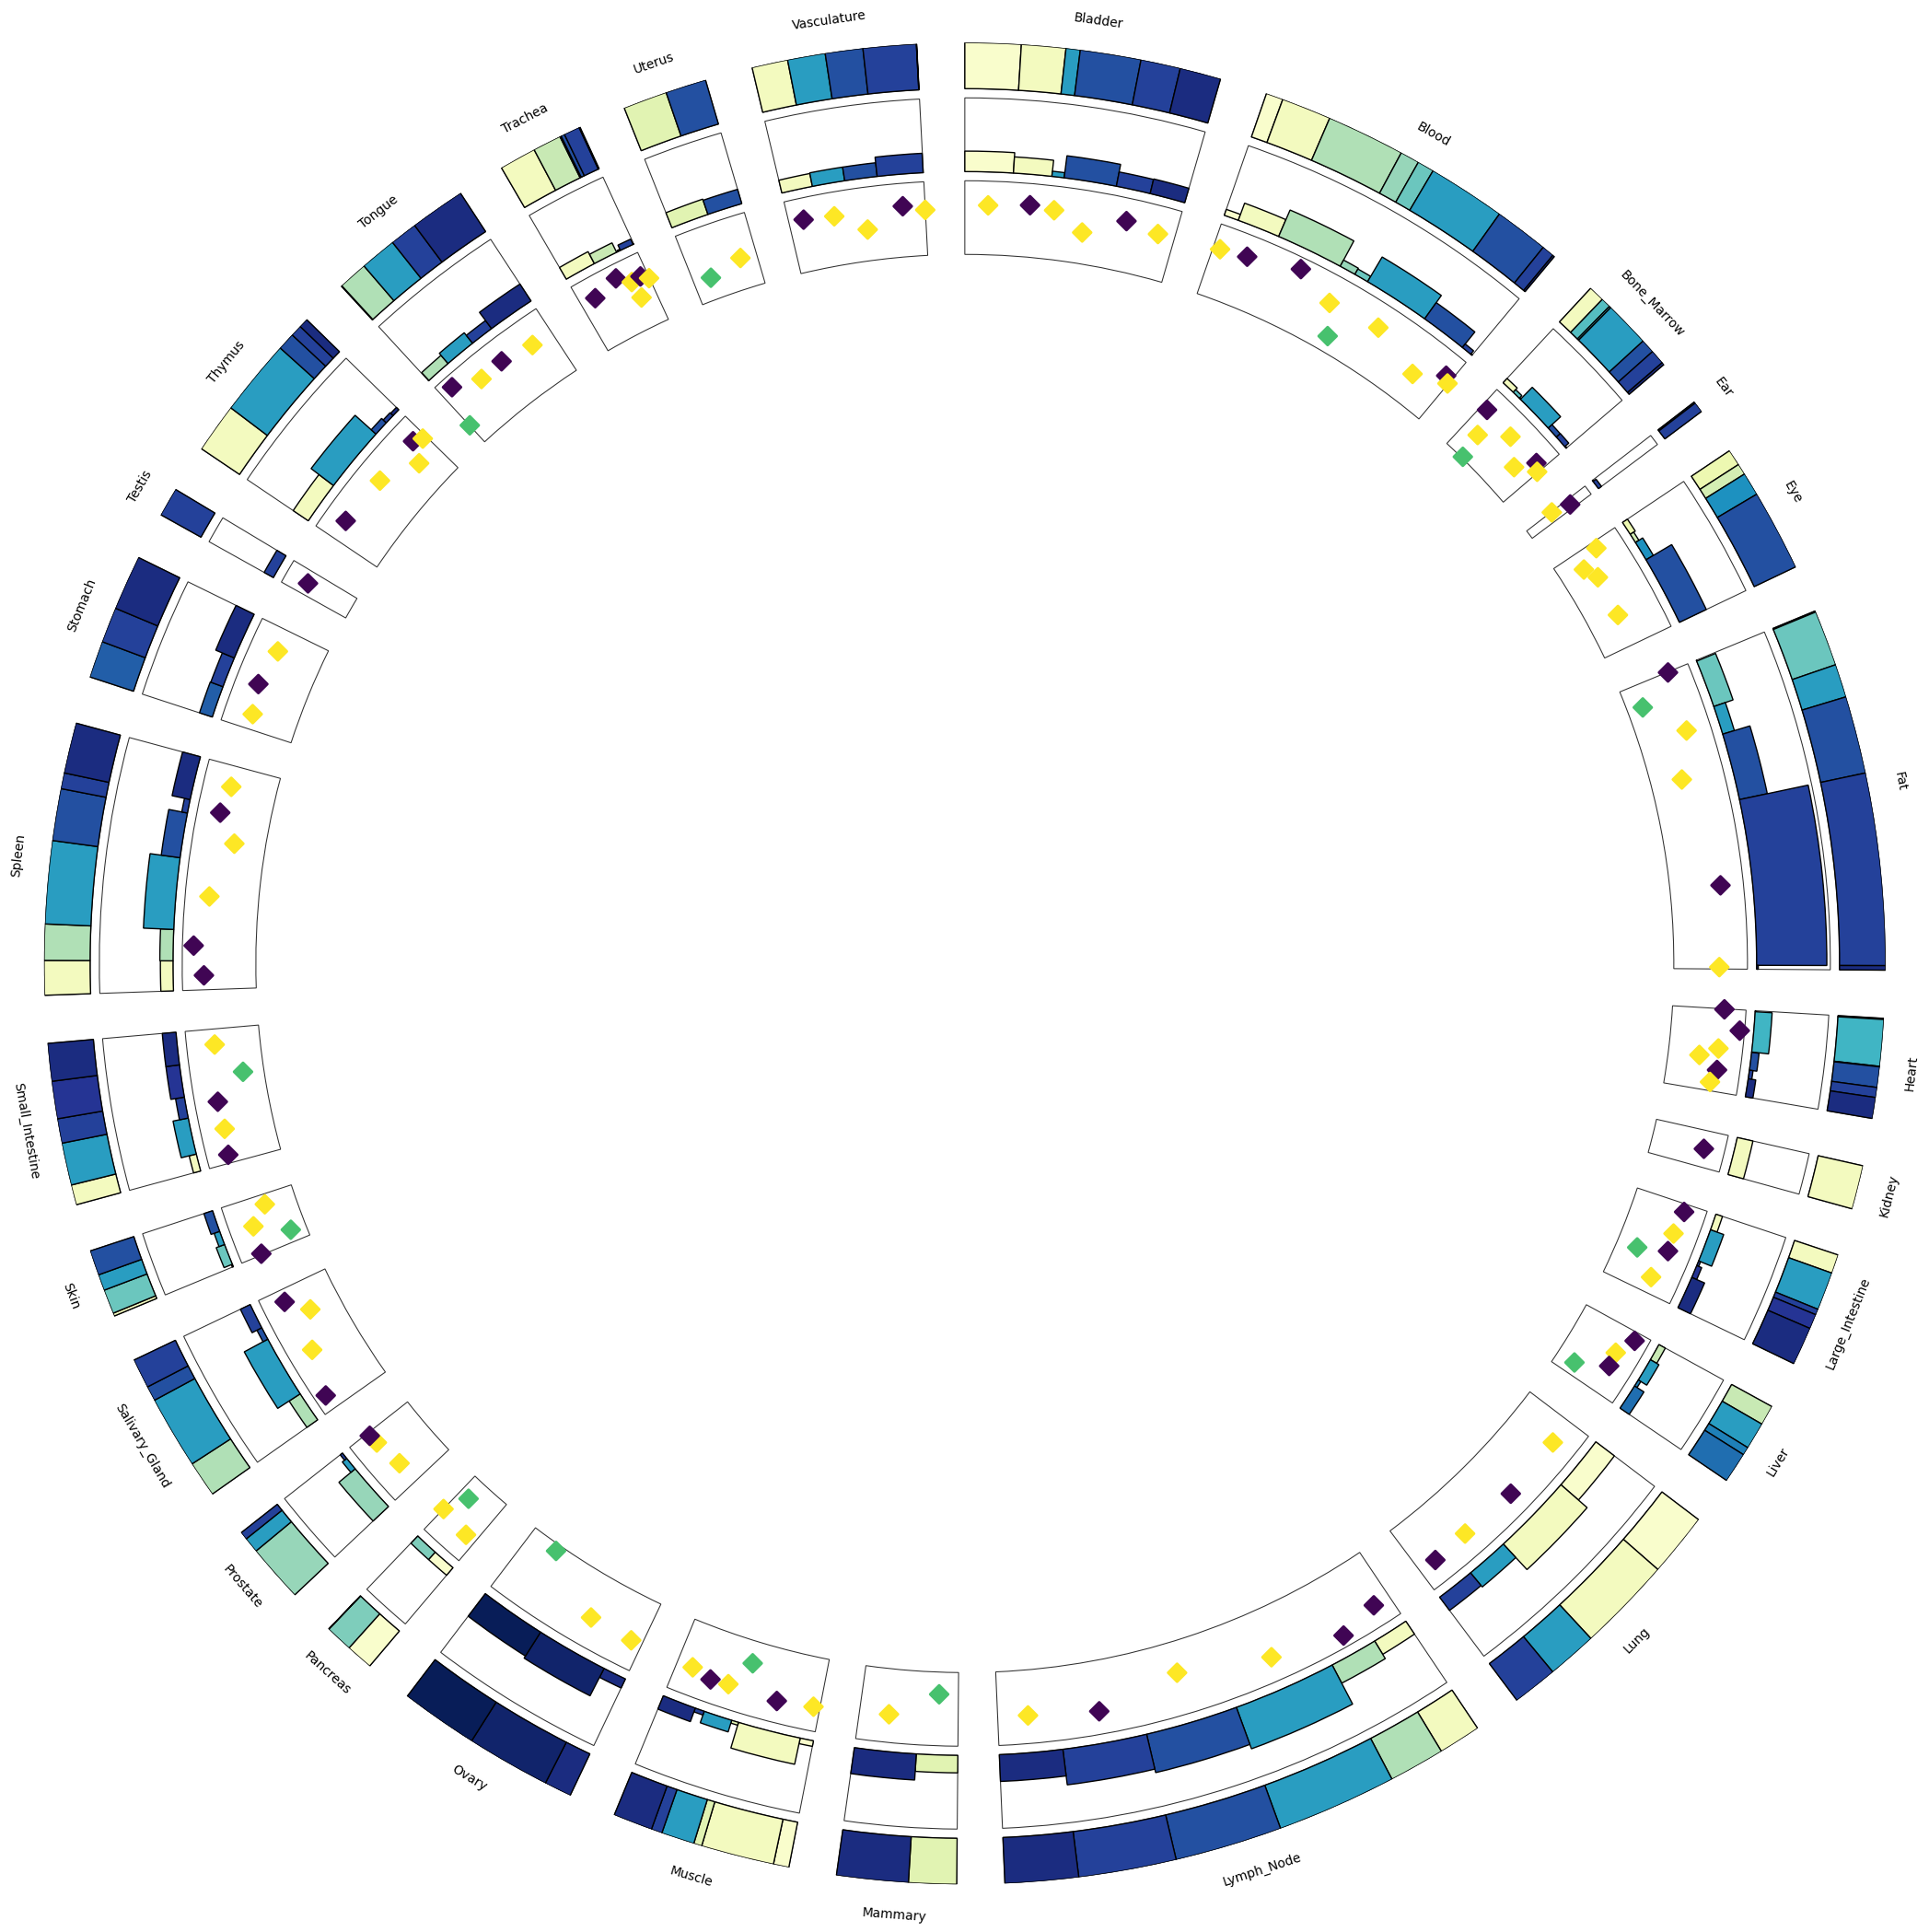

In [ ]:
circle.figure

In [ ]:
arcdata_dict = collections.defaultdict(dict)
with open("circos/tissuesexcounts.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]
        start = int(line[1])-1
        width = int(line[2])-1-(int(line[1]))#-1)
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = []
            arcdata_dict[name]["colors"]    = []
        arcdata_dict[name]["positions"].append(start)
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["colors"].append(sex_color_dict[line[-1]])

for key in arcdata_dict:
    circle.barplot(key, data=[1]*len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"],
                   width=arcdata_dict[key]["widths"], raxis_range=[680,760], 
                   facecolor=arcdata_dict[key]["colors"],
                   linewidth=1, edgecolor="k")


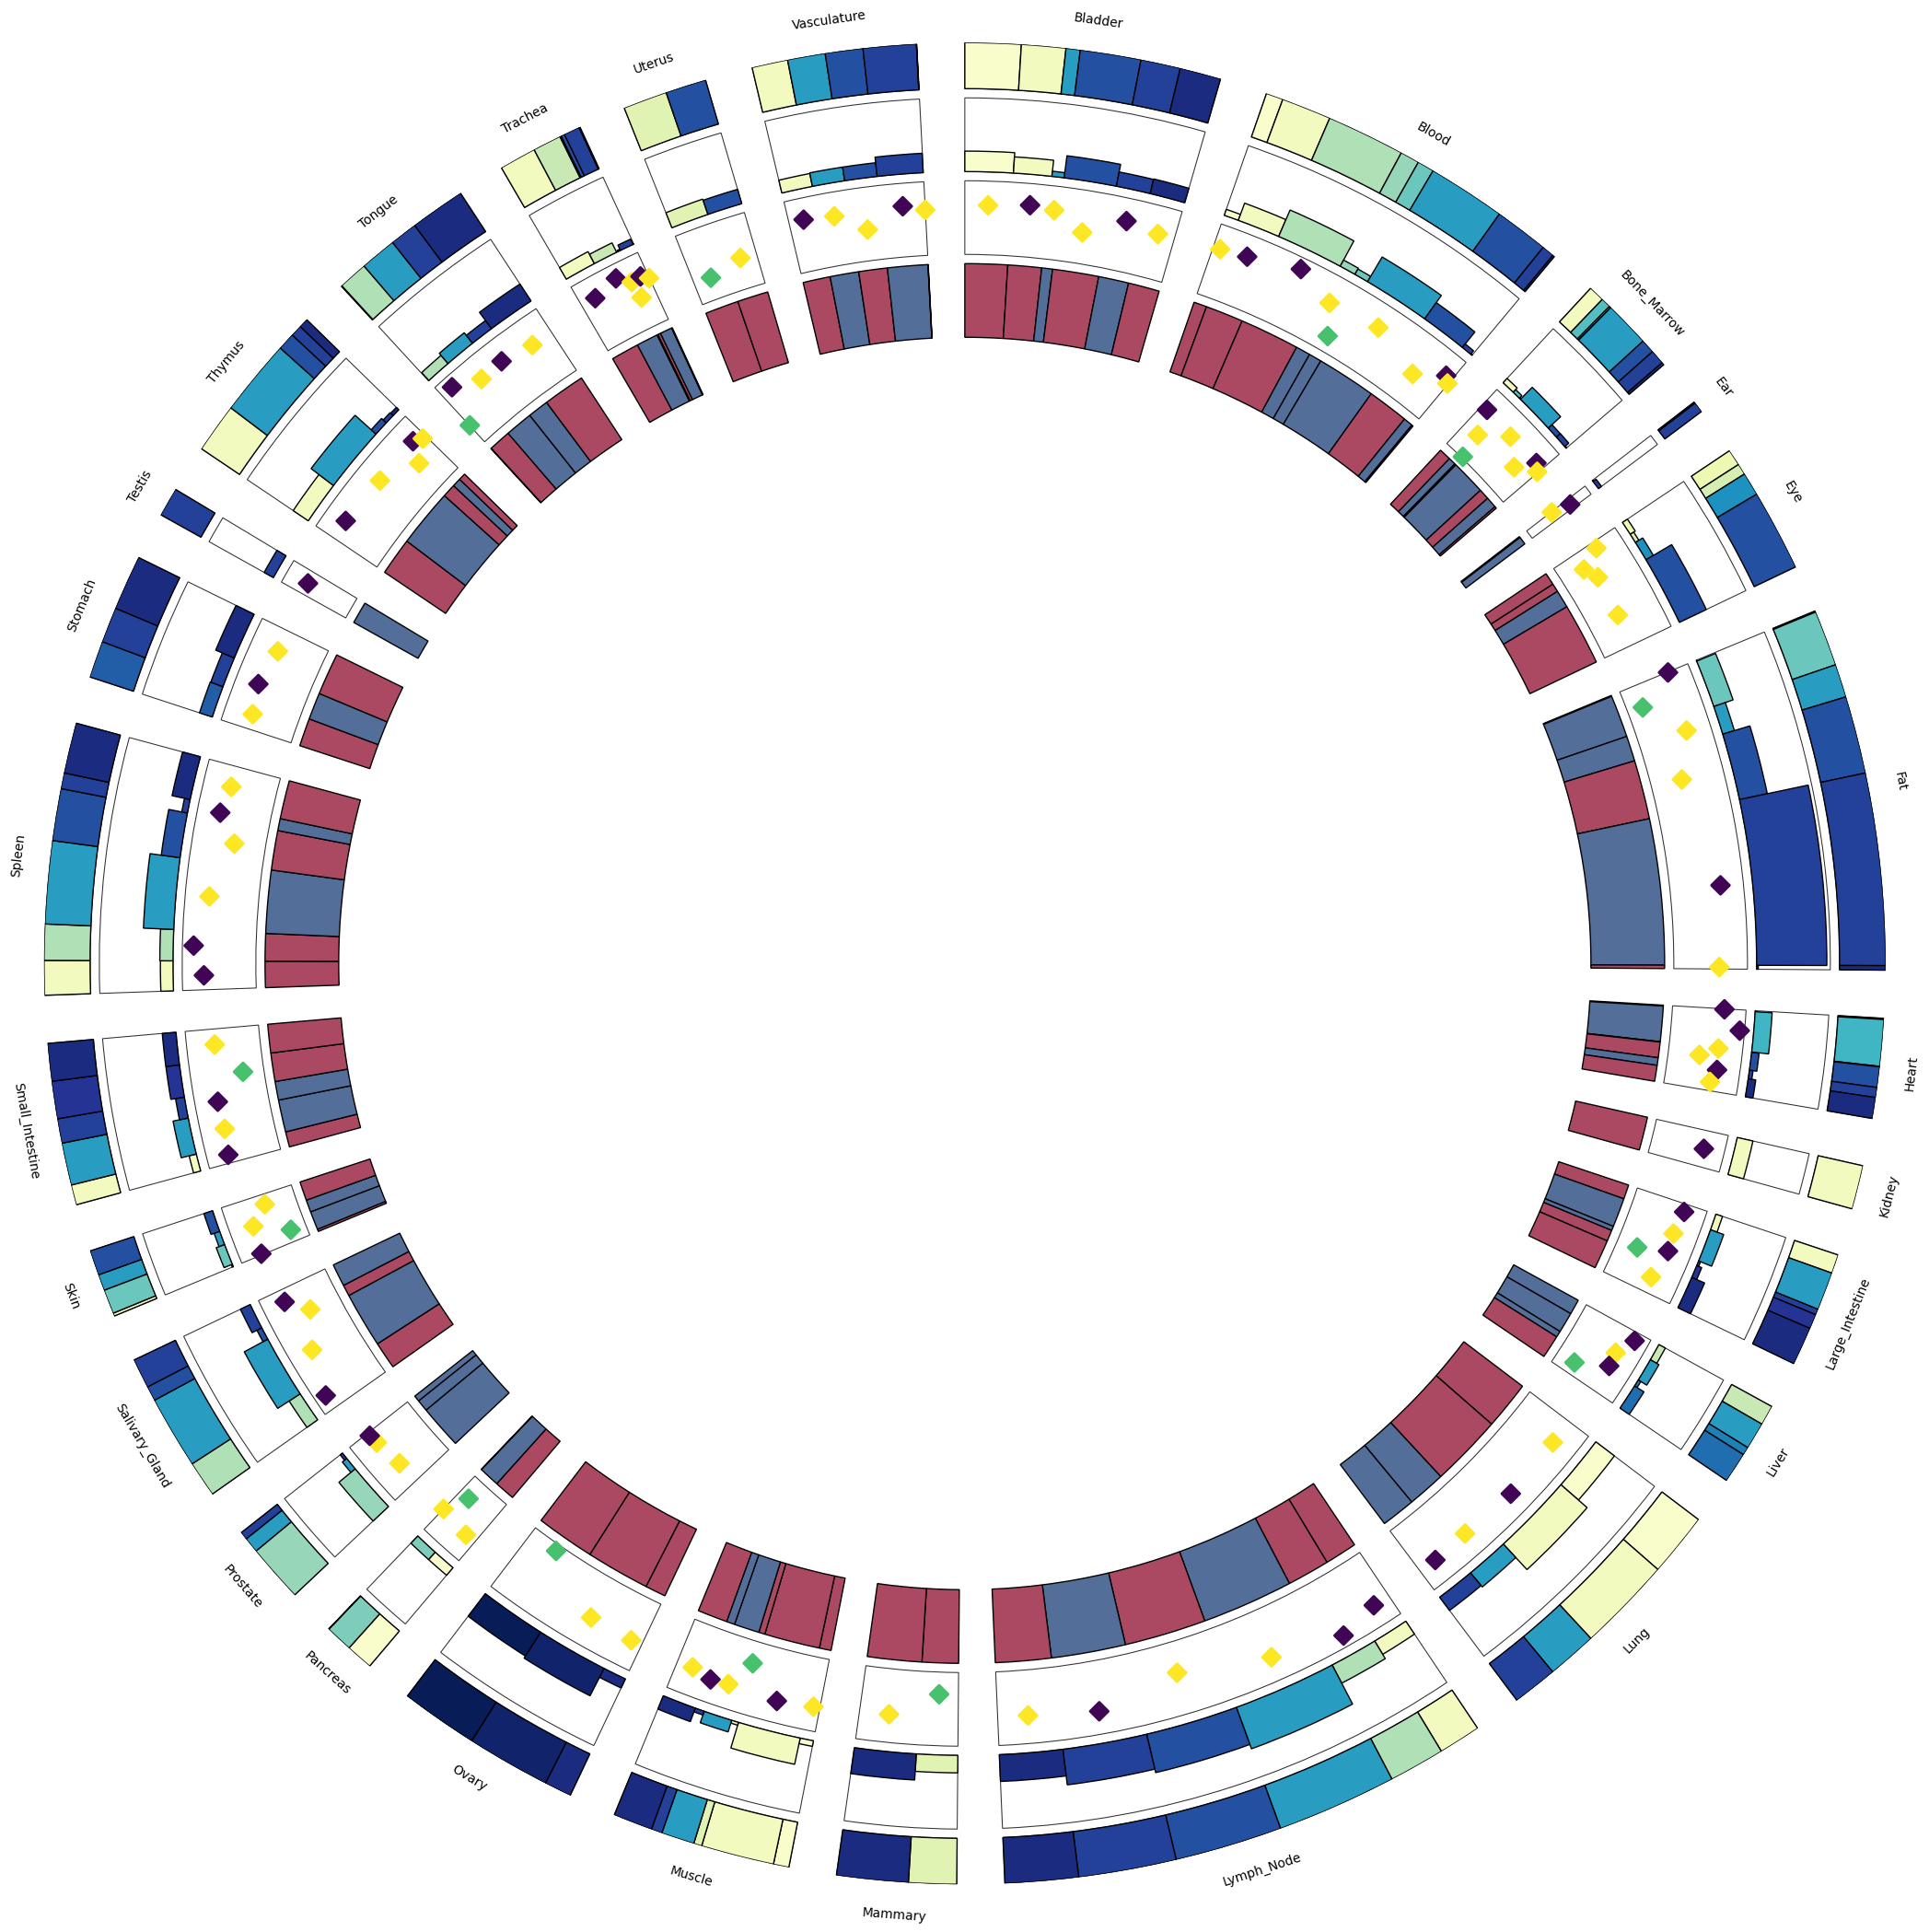

In [ ]:
circle.figure

In [ ]:
circle.figure.savefig("sapiens_mainFig1_circus.pdf",bbox_inches='tight')